In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import dates
import math
from astropy.time import Time


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.neural_network import MLPRegressor
plt.style.use('seaborn-dark-palette')

In [2]:
jedi = pd.read_csv('jedi_v1_og.csv', low_memory=False)
demon = pd.read_csv('DEMON.csv', parse_dates=[['Year', 'Month', 'Day', 'Peak Time']])

demon.drop(demon.index[0], inplace=True)
demon.drop(demon.index[4595], inplace=True)

demon.index = pd.DatetimeIndex(demon['Year_Month_Day_Peak Time'])
demon.index.rename('Peak Datetime', inplace=True)
demon.drop(['Year_Month_Day_Peak Time'], inplace=True, axis=1)
demon.sort_index(inplace=True)
demon = demon.convert_objects(convert_numeric=True)

demon = demon[jedi['GOES Flare Start Time'][0]: jedi['GOES Flare Start Time'][len(jedi) - 1]]


C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


In [3]:
demon

,Intensity,Start,End,Event #,Max Drop,Lat,Lon,dist.R,AR#,Count,Flare
Peak Datetime,,,,,,,,,,,
2010-05-23 16:46:00,-252.0,16:46,17:48,4321,44.0,28.0,-3.0,0.50,NaN,40,NaN
2010-05-24 13:24:00,-94.0,13:22,13:52,4322,62.0,17.0,33.0,0.61,NaN,24,NaN
2010-05-31 19:54:00,-281.0,19:38,20:34,4323,41.0,24.0,29.0,0.62,NaN,37,NaN
2010-06-12 01:08:00,-98.0,1:04,1:50,4324,84.0,29.0,52.0,0.85,AR 1081,32,M4
2010-06-12 09:28:00,-61.0,9:28,9:52,4325,104.0,25.0,58.0,0.88,AR 1081,21,M2
2010-06-13 05:46:00,-370.0,5:42,6:32,4326,376.0,NaN,NaN,1.08,NaN,34,M2
2010-06-14 00:58:00,-86.0,0:58,1:28,4327,215.0,NaN,NaN,1.01,NaN,24,C2
2010-06-16 03:24:00,-139.0,3:16,4:04,4328,69.0,NaN,NaN,1.05,NaN,33,NaN
2010-06-20 01:26:00,-42.0,1:24,1:50,4329,11.0,NaN,NaN,1.08,NaN,22,NaN


In [4]:
jedi_demon_events = pd.read_csv('Jedi_Demon_Events.csv')

In [5]:
flare_conversion = {"A": 1, "B": 10, "C": 100, "M": 1000, "X":10000}
flareClass = demon.loc[:, 'Flare'].values
flareClass.flatten()

flare_converted = []
tempBool = True
for k in range(len(flareClass)):
    tempBool = True
    for i, v in flare_conversion.items():
        tempString = flareClass[k]
        tempString = str(tempString)
        if tempString[:1] == i:
            flare_converted.append(round((float(tempString[1:]) * v)))
            tempBool = False
            
    if tempBool and math.isnan(float(tempString)) :
            flare_converted.append(np.nan)
            

flare_converted = np.array(flare_converted)

In [6]:
for i in range(len(flare_converted)):
    if math.isnan(flare_converted[i]):
        flare_converted[i] = 1

In [7]:
demon.insert(11, 'Flare Converted', flare_converted)

In [8]:
demon

,Intensity,Start,End,Event #,Max Drop,Lat,Lon,dist.R,AR#,Count,Flare,Flare Converted
Peak Datetime,,,,,,,,,,,,
2010-05-23 16:46:00,-252.0,16:46,17:48,4321,44.0,28.0,-3.0,0.50,NaN,40,NaN,1.0
2010-05-24 13:24:00,-94.0,13:22,13:52,4322,62.0,17.0,33.0,0.61,NaN,24,NaN,1.0
2010-05-31 19:54:00,-281.0,19:38,20:34,4323,41.0,24.0,29.0,0.62,NaN,37,NaN,1.0
2010-06-12 01:08:00,-98.0,1:04,1:50,4324,84.0,29.0,52.0,0.85,AR 1081,32,M4,4000.0
2010-06-12 09:28:00,-61.0,9:28,9:52,4325,104.0,25.0,58.0,0.88,AR 1081,21,M2,2000.0
2010-06-13 05:46:00,-370.0,5:42,6:32,4326,376.0,NaN,NaN,1.08,NaN,34,M2,2000.0
2010-06-14 00:58:00,-86.0,0:58,1:28,4327,215.0,NaN,NaN,1.01,NaN,24,C2,200.0
2010-06-16 03:24:00,-139.0,3:16,4:04,4328,69.0,NaN,NaN,1.05,NaN,33,NaN,1.0
2010-06-20 01:26:00,-42.0,1:24,1:50,4329,11.0,NaN,NaN,1.08,NaN,22,NaN,1.0


In [9]:
demon['Intensity'] = np.abs(demon.loc[:, 'Intensity'].values)

In [10]:
def turnIntoSeconds(timeArray):
    secondArray = []
    for i in range(len(timeArray)):
        timeValue = timeArray[i]
        print(timeValue)
        if len(timeValue) == 5:
            hours = timeValue[:2]
            minutes = timeValue[3:]
        else:
            hours = timeValue[:1]
            minutes = timeValue[2:]
            
        secondHours = round(float(hours) * 60 * 60)
        minuteHours = round(float(minutes) * 60)
        
        secondArray.append((secondHours + minuteHours))
    return secondArray

In [11]:
def time_diff(start, end):
    SEC_IN_DAY = 86400
    delta_time = []
    for i in range(len(end)):
        if end[i] < start[i]:
            delta_time.append(end[i] + (SEC_IN_DAY - start[i]))          
        else:
            delta_time.append(end[i] - start[i])
    return delta_time

In [12]:
start_time = demon['Start'].values
end_time = demon['End'].values


tempArray = turnIntoSeconds(start_time)
start_seconds = np.array(tempArray)
tempList = turnIntoSeconds(end_time)
end_seconds = np.array(tempList)

dimming_time_temp = time_diff(start_seconds, end_seconds)

dimming_time = np.array(dimming_time_temp)
demon.insert(3, 'Delta/Dimming Time', dimming_time)

16:46
13:22
19:38
1:04
9:28
5:42
0:58
3:16
1:24
18:56
20:40
17:00
10:24
9:06
19:46
22:38
15:18
17:50
13:00
9:00
1:02
7:50
5:30
7:28
20:48
17:36
20:14
21:34
1:28
18:06
11:28
12:14
15:40
9:38
5:38
6:54
8:04
23:58
5:02
22:40
16:20
9:38
15:04
3:48
14:44
15:30
7:16
14:38
23:06
1:12
7:12
4:34
9:50
8:26
0:14
4:30
19:18
16:36
19:08
20:48
23:14
17:58
6:04
12:22
0:02
8:34
15:42
2:18
19:04
19:52
1:40
9:24
17:18
13:04
15:22
14:46
4:46
21:24
1:42
17:44
4:14
21:28
2:18
6:04
19:22
4:06
14:46
22:12
3:12
4:32
9:12
2:34
3:40
15:32
22:18
8:58
12:10
1:06
4:26
1:40
17:00
10:34
11:18
14:02
17:48
19:54
21:20
1:38
7:06
13:48
8:04
10:04
12:48
21:46
1:12
2:24
4:32
14:38
20:34
14:08
17:46
2:52
5:02
7:06
13:00
14:48
17:34
19:36
22:56
0:46
1:58
4:14
9:12
14:42
23:38
14:32
15:56
17:52
21:44
0:34
21:42
6:40
7:40
10:36
11:08
17:36
1:18
3:34
5:00
7:34
10:00
2:46
3:08
5:00
17:24
13:58
19:00
12:08
15:30
16:34
10:30
14:02
19:46
3:42
6:16
14:44
18:22
21:30
2:42
10:44
15:44
22:06
23:34
4:20
6:44
9:54
11:52
21:58
0:40
21:02

5:16
8:46
17:24
15:04
16:44
21:34
15:36
5:40
21:24
5:40
9:02
10:40
12:26
18:22
23:52
1:20
3:44
5:02
6:40
10:24
13:34
16:04
18:40
20:42
21:26
23:54
6:24
7:54
11:26
15:30
22:42
7:28
8:48
10:46
11:26
23:30
1:22
2:50
4:14
8:06
10:24
13:56
15:00
17:04
17:56
21:12
21:50
23:02
1:02
3:06
5:02
7:06
8:34
11:00
16:00
17:34
18:44
20:50
22:44
5:20
8:16
11:58
12:52
18:04
1:20
4:48
10:26
11:54
14:32
20:34
21:48
2:42
18:44
21:52
17:30
13:46
20:52
20:00
21:08
22:16
3:12
4:44
7:22
13:30
19:40
22:38
23:22
23:50
12:32
15:20
1:48
5:58
7:50
11:14
12:04
13:50
18:20
19:40
22:18
0:02
23:42
2:06
3:26
8:56
10:08
13:50
21:40
3:46
5:30
10:30
14:32
23:14
1:44
2:20
2:54
4:32
9:38
10:14
14:14
20:28
5:16
22:30
0:40
17:10
21:06
15:02
4:04
0:06
2:54
19:54
20:36
5:04
6:26
8:00
9:38
19:38
22:06
23:00
1:42
2:22
3:44
4:54
7:00
9:14
12:56
16:44
17:56
20:32
21:46
2:28
3:40
4:18
5:44
21:16
0:44
10:26
14:54
19:16
2:12
11:38
13:30
6:06
11:06
14:32
2:42
8:26
3:24
23:50
14:44
1:36
10:14
0:48
19:38
22:36
10:16
14:40
5:38
0:30
4:22


17:44
22:00
8:14
16:02
0:04
5:56
8:56
13:16
14:42
16:16
18:02
19:12
22:38
2:04
6:34
16:02
18:00
20:46
21:52
1:04
5:14
7:58
11:44
13:10
15:40
16:38
19:00
20:36
21:58
22:38
2:54
7:32
14:50
17:04
18:44
20:22
1:30
13:00
22:20
22:48
8:32
18:34
19:04
14:06
16:00
2:48
3:30
20:52
22:24
1:18
2:06
2:40
4:48
5:42
7:24
10:00
14:06
18:38
4:12
5:52
6:58
11:32
13:36
17:20
19:16
20:10
21:04
22:06
1:46
8:06
9:52
11:14
12:52
16:06
17:28
20:10
1:18
1:40
6:36
8:50
9:38
12:18
13:44
14:32
15:16
16:46
19:40
20:56
22:46
2:12
3:18
4:52
6:44
7:56
9:10
11:14
13:36
17:00
17:54
18:50
19:52
21:56
0:28
1:40
5:22
6:14
8:54
10:46
13:10
14:50
18:18
20:58
21:42
23:10
0:18
1:56
2:34
4:32
7:14
8:24
10:34
12:28
14:56
16:00
21:12
23:06
2:22
4:04
11:00
11:38
13:00
0:18
3:04
3:52
11:24
20:08
1:00
6:44
8:46
10:08
11:00
14:08
19:52
20:34
21:46
23:38
9:34
10:50
20:46
1:24
11:36
15:16
1:54
4:34
9:46
13:26
18:28
19:42
20:44
21:20
23:30
0:12
4:24
5:54
8:14
19:36
6:42
19:14
9:10
23:06
13:36
3:06
11:58
0:48
10:32
23:24
0:56
3:08
4:40

In [13]:
demon['Fraction of dimming on disk'] = np.nan
demon['Fractional size of off-limb dimming contribution'] = np.nan

dimming_size = pd.read_csv('jake_dimming_sizes.csv', low_memory=False)

demon_eventnum = demon.loc[:, 'Event #'].values
dimming_size_events = dimming_size.loc[:, 'Event number'].values

In [14]:
for i in range(len(demon)):
    for k in range(len(dimming_size)):
        if demon_eventnum[i] == dimming_size_events[k]:
            demon['Fraction of dimming on disk'].iloc[i] = dimming_size['Fraction of dimming on disk'].iloc[k]
            demon['Fractional size of off-limb dimming contribution'].iloc[i] = dimming_size['Fractional size of off-limb dimming contribution'].iloc[k]
            

C:\Users\kelly\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
total_fraction_of_disk = demon.filter(like='Fraction').T.sum()
fract_off_limb = demon.filter(regex='Fractional size of off-limb dimming contribution').values
fract_off_limb.flatten()

percent_off_limb = []
for i in range(len(total_fraction_of_disk)):
    percent_off_limb.append((fract_off_limb.flatten()[i] / total_fraction_of_disk.values[i]) * 100)
    
    
is_off_limb = []
count = 0
for i in range(len(percent_off_limb)):
    if percent_off_limb[i] > 75:
        is_off_limb.append(True)
        count += 1
    else:
        is_off_limb.append(False)


is_off_limb_arr = np.array(is_off_limb)
percent_off_limb_arr = np.array(percent_off_limb)

demon.insert(15, 'Off-Limb Percent', percent_off_limb_arr)
demon.insert(15, 'Is Off-Limb', is_off_limb_arr)

In [16]:
demon.head(1)

,Intensity,Start,End,Delta/Dimming Time,Event #,Max Drop,Lat,Lon,dist.R,AR#,Count,Flare,Flare Converted,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Is Off-Limb,Off-Limb Percent
Peak Datetime,,,,,,,,,,,,,,,,,
2010-05-23 16:46:00,252.0,16:46,17:48,3720,4321,44.0,28.0,-3.0,0.5,NaN,40,NaN,1.0,0.030997,0.000008,False,0.02635


In [17]:
intensity = demon[['Intensity']].values
time_change = demon[['Delta/Dimming Time']].values
flare_conv = demon[['Flare Converted']].values
frac_on = demon[['Fraction of dimming on disk']].values
frac_off = demon[['Fractional size of off-limb dimming contribution']].values
off_limb_percent = demon[['Off-Limb Percent']].values
drop = demon[['Max Drop']]
imp = Imputer(strategy='mean')

intensity_f = imp.fit_transform(intensity)
time_change_f = imp.fit_transform(time_change)
flare_conv_f = imp.fit_transform(flare_conv)
frac_on_f = imp.fit_transform(frac_on)
frac_off_f = imp.fit_transform(frac_off)
off_limb_percent_f = imp.fit_transform(off_limb_percent)
drop_f = imp.fit_transform(drop)

demon['Intensity'] = intensity_f
demon['Delta/Dimming Time'] = time_change_f
demon['Flare Converted'] = flare_conv_f
demon['Fraction of dimming on disk'] = frac_on_f
demon['Fractional size of off-limb dimming contribution'] = frac_off_f
demon['Off-Limb Percent'] = off_limb_percent_f
demon['Max Drop'] = drop_f


In [18]:
demon.to_csv('Demon_Additional_Data.csv', header=True, index=True, mode='w')

In [19]:
demon_sub = demon[[ 'Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Max Drop',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent']]

In [20]:
def norm(name):
    normed_data = (demon_sub[name] - np.min(demon_sub[name])) / (np.max(demon_sub[name]) - np.min(demon_sub[name]))
    return normed_data

In [21]:
def stand(name):
    stand_data = (demon_sub[name] - np.mean(demon_sub[name])) / (np.std(demon_sub[name]))
    return stand_data

In [22]:
sub_columns = demon_sub.columns
for i in sub_columns:
    demon_sub[i] = norm(i)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
demon_sub_copy = demon_sub.copy()
sub_columns = demon_sub_copy.columns
for i in sub_columns:
    demon_sub_copy[i] = stand(i)

In [24]:
demon_sub.describe()

,Delta/Dimming Time,Flare Converted,Fraction of dimming on disk,Max Drop,Fractional size of off-limb dimming contribution,Off-Limb Percent
count,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,0.094209,0.012260,0.030717,0.082176,0.032210,0.285595
std,0.060979,0.056091,0.058121,0.108176,0.074816,0.414140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054852,0.000000,0.001417,0.023350,0.000001,0.001092
50%,0.071730,0.000000,0.011381,0.048731,0.000004,0.005364
75%,0.109705,0.004975,0.033338,0.095431,0.030180,0.726075
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y = pd.DataFrame((demon['Intensity'] - np.min(demon['Intensity'])) / (np.max(demon['Intensity']) - np.min(demon['Intensity'])))

In [26]:
y.values.ravel()

array([0.25377644, 0.09466264, 0.28298087, ..., 0.21953676, 0.10473313,
       0.06747231])

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
nn = MLPRegressor(hidden_layer_sizes=(6, 4, 1), max_iter=500, solver='sgd', learning_rate_init=.15, tol=.000001, verbose=True)

In [29]:
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.metrics import accuracy_score

C:\Users\kelly\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\kelly\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [30]:
X1, X2, y1, y2 = train_test_split(demon_sub, y.values.ravel(), train_size=.8)

In [31]:
nn.fit(X1, y1)

Iteration 1, loss = 0.04419623
Iteration 2, loss = 0.01296899
Iteration 3, loss = 0.01231745
Iteration 4, loss = 0.01227734
Iteration 5, loss = 0.01228570
Iteration 6, loss = 0.01226055
Iteration 7, loss = 0.01230684
Iteration 8, loss = 0.01228577
Iteration 9, loss = 0.01226074
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4, 1), learning_rate='constant',
       learning_rate_init=0.15, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [32]:

y2_model = nn.predict(X2)

In [33]:
y2_model.max()

0.11856623234050126

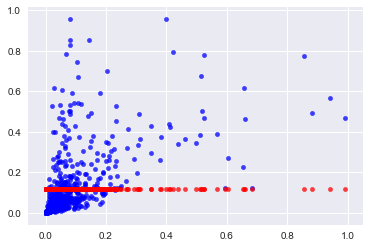

In [34]:
plt.scatter(X2.loc[:, 'Max Drop'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Max Drop'], y2_model[:], alpha=.75, c='red', s=20)

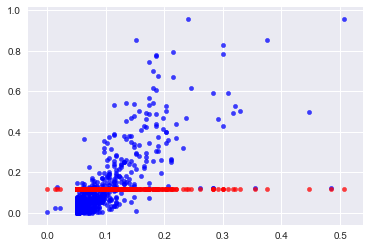

In [35]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)

In [36]:
nn.score(X1, y1)

-0.00045951075717431955

In [37]:
nn2 = MLPRegressor(hidden_layer_sizes=(6, 4, 1), max_iter=500, solver='sgd', learning_rate_init=.15, tol=.000001, verbose=True)

In [38]:
demon_sub = demon[[ 'Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Intensity',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent']]

sub_columns = demon_sub.columns
for i in sub_columns:
    demon_sub[i] = norm(i)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
y = pd.DataFrame((demon['Max Drop'] - np.min(demon['Max Drop'])) / (np.max(demon['Max Drop']) - np.min(demon['Max Drop'])))

In [40]:
X1, X2, y1, y2 = train_test_split(demon_sub, y.values.ravel(), train_size=.8)

In [41]:
nn2.fit(X1, y1)

Iteration 1, loss = 0.01750755
Iteration 2, loss = 0.00592717
Iteration 3, loss = 0.00574993
Iteration 4, loss = 0.00575078
Iteration 5, loss = 0.00576447
Iteration 6, loss = 0.00575135
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4, 1), learning_rate='constant',
       learning_rate_init=0.15, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [42]:
y2_model = nn2.predict(X2)

In [43]:
y2_model

array([0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934575,
       0.07934575, 0.07934575, 0.07934575, 0.07934575, 0.07934

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


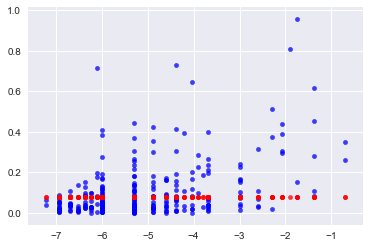

In [44]:
plt.scatter(np.log(X2.loc[:, 'Flare Converted']), y2[:], alpha=.75, c='blue', s=20)
plt.scatter(np.log(X2.loc[:, 'Flare Converted']), y2_model[:], alpha=.75, c='red', s=20)

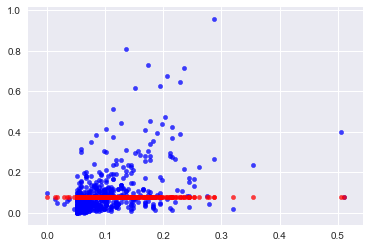

In [45]:
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2[:], alpha=.75, c='blue', s=20)
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20)

In [46]:
nn2.score(X2, y2)

-0.005784356984296801

In [47]:
demon_sub = demon[[ 'Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Intensity',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent']]
demon_sub_copy = demon_sub.copy()
sub_columns = demon_sub_copy.columns
for i in sub_columns:
    demon_sub_copy[i] = stand(i)

In [48]:
y = pd.DataFrame((demon['Max Drop'] - np.mean(demon['Max Drop'])) / (np.std(demon['Max Drop'])))
X1, X2, y1, y2 = train_test_split(demon_sub_copy, y.values.ravel(), train_size=.8)

In [49]:
nn3 = MLPRegressor(hidden_layer_sizes=(6, 4, 1), max_iter=500, solver='sgd', learning_rate_init=.01, tol=.000001, verbose=True)

In [50]:
nn3.fit(X1, y1)


Iteration 1, loss = 1.25207733
Iteration 2, loss = 0.54245863
Iteration 3, loss = 0.49620812
Iteration 4, loss = 0.49420686
Iteration 5, loss = 0.48617921
Iteration 6, loss = 0.48608597
Iteration 7, loss = 0.48621713
Iteration 8, loss = 0.48599433
Iteration 9, loss = 0.48602369
Iteration 10, loss = 0.48590367
Iteration 11, loss = 0.48597971
Iteration 12, loss = 0.48598997
Iteration 13, loss = 0.48604015
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 4, 1), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [51]:
y2_model = nn3.predict(X2)


In [52]:
X2.shape

(618, 6)

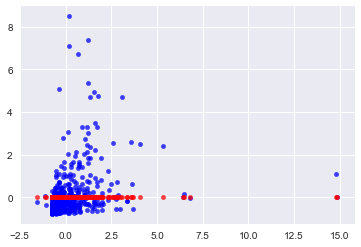

In [53]:
plt.scatter(X2[['Delta/Dimming Time']], y2[:], alpha=.75, c='blue',s=20);
plt.scatter(X2.loc[:, 'Delta/Dimming Time'], y2_model[:], alpha=.75, c='red', s=20);

In [54]:
nn3.score(X2, y2)

-0.001941850199864259

In [55]:
demon_sub_copy = demon[[ 'Delta/Dimming Time', 'Flare Converted', 'Fraction of dimming on disk', 'Intensity',
                   'Fractional size of off-limb dimming contribution', 'Off-Limb Percent']]

sub_columns = demon_sub.columns
for i in sub_columns:
    demon_sub_copy[i] = stand(i)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
y = pd.DataFrame((demon['Max Drop'] - np.mean(demon['Max Drop'])) / np.std(demon['Max Drop']))

In [57]:
X1, X2, y1, y2 = train_test_split(demon_sub_copy, y.values.ravel(), train_size=.8)

In [58]:
nn4 = MLPRegressor(hidden_layer_sizes=(6, 6, 1), max_iter=500, solver='sgd', learning_rate_init=.02, tol=.000001, verbose=True)

In [59]:
nn4.fit(X1, y1)

Iteration 1, loss = 0.78545704
Iteration 2, loss = 0.49616103
Iteration 3, loss = 0.48376129
Iteration 4, loss = 0.47606291
Iteration 5, loss = 0.47480814
Iteration 6, loss = 0.47461736
Iteration 7, loss = 0.47470343
Iteration 8, loss = 0.47482504
Iteration 9, loss = 0.47480334
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 6, 1), learning_rate='constant',
       learning_rate_init=0.02, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=1e-06, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [60]:
y2_model = nn4.predict(X2)

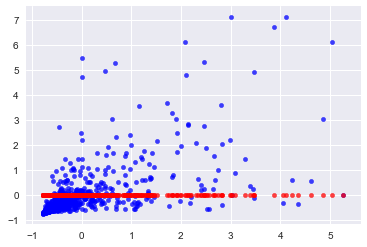

In [61]:
plt.scatter(X2[['Intensity']], y2[:], alpha=.75, c='blue',s=20);
plt.scatter(X2.loc[:, 'Intensity'], y2_model[:], alpha=.75, c='red', s=20);

In [62]:
nn4.score(X2, y2)

-0.0034660886564563675

In [63]:
demon

,Intensity,Start,End,Delta/Dimming Time,Event #,Max Drop,Lat,Lon,dist.R,AR#,Count,Flare,Flare Converted,Fraction of dimming on disk,Fractional size of off-limb dimming contribution,Is Off-Limb,Off-Limb Percent
Peak Datetime,,,,,,,,,,,,,,,,,
2010-05-23 16:46:00,252.000000,16:46,17:48,3720.0,4321,44.0,28.0,-3.0,0.50,NaN,40,NaN,1.0,0.030997,0.000008,False,0.026350
2010-05-24 13:24:00,94.000000,13:22,13:52,1800.0,4322,62.0,17.0,33.0,0.61,NaN,24,NaN,1.0,0.008529,0.000008,False,0.095694
2010-05-31 19:54:00,281.000000,19:38,20:34,3360.0,4323,41.0,24.0,29.0,0.62,NaN,37,NaN,1.0,0.023061,0.000008,False,0.035501
2010-06-12 01:08:00,98.000000,1:04,1:50,2760.0,4324,84.0,29.0,52.0,0.85,AR 1081,32,M4,4000.0,0.010658,0.000173,False,1.593318
2010-06-12 09:28:00,61.000000,9:28,9:52,1440.0,4325,104.0,25.0,58.0,0.88,AR 1081,21,M2,2000.0,0.004628,0.000008,False,0.177313
2010-06-13 05:46:00,370.000000,5:42,6:32,3000.0,4326,376.0,NaN,NaN,1.08,NaN,34,M2,2000.0,0.000288,0.027543,True,98.966030
2010-06-14 00:58:00,86.000000,0:58,1:28,1800.0,4327,215.0,NaN,NaN,1.01,NaN,24,C2,200.0,0.000501,0.006511,True,92.848768
2010-06-16 03:24:00,139.000000,3:16,4:04,2880.0,4328,69.0,NaN,NaN,1.05,NaN,33,NaN,1.0,0.000049,0.011400,True,99.568555
2010-06-20 01:26:00,42.000000,1:24,1:50,1560.0,4329,11.0,NaN,NaN,1.08,NaN,22,NaN,1.0,0.000008,0.006740,True,99.878038
